# Week 8: Discussion section
## Social dimensions of Eaton and Palisades fires

### Setup
1. Find fire perimeters for the Eaton and Palisades fires that occurred in Los Angeles County on 2025. There are several datasets with this information online. You will need to independently select one from a reputable source (it may be more than one file). These are the same files you will use for assignment 4.

2. Add the fire perimeter datasets to the data directory in your eds-220-sections directory.

3. Download the 2024 Environmental Justice Index data for California in the geodatabase data format. Add it to the data directory in your eds-220-sections directory.

### 1. Metadata exploration
a. Review the CSV with the metadata information for the EJI data.

b. Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. You’ll be working with some of them in the following exercises.

- E_RENTER	EP_RENTER

Percentile ranking of renter-occupied housing units (0-100)
Higher percentile = more renters compared to other tracts
Why it matters for wildfire: Renters often have less control over property hardening (fire-resistant materials), less attachment to community, and may face barriers to evacuation/recovery due to housing instability

- E_AGE65	EP_AGE65

Percentile ranking of population aged 65 and older (0-100)
Why it matters for wildfire: Elderly residents may have mobility limitations, health vulnerabilities, need assistance evacuating, and face longer recovery times

- E_POVERTY	EP_POVERTY

Percentile ranking of population below poverty level (0-100)
Why it matters for wildfire: Low-income communities may lack resources for preparedness, evacuation, and recovery, and may live in higher-risk areas due to affordable housing availability

### 2. Polygon intersection
a. Open the fire perimeters and the EJI data and do initial data exploration.

In [46]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [13]:
# Define the file path
fp = os.path.join('data', 'week8data', 'Eaton_Perimeter_20250121')

# Use geopandas.read_file() to read Eaton perimeter data
eaton = gpd.read_file(fp)
# Lowercase all column names in the GeoDataFrame
eaton.columns = eaton.columns.str.lower()

In [14]:
# Define the file path
fp1 = os.path.join('data', 'week8data', 'Palisades_Perimeter_20250121')

# Use geopandas.read_file() to read Palisades perimeter data
palisades = gpd.read_file(fp1)
# Lowercase all column names in the GeoDataFrame
palisades.columns = palisades.columns.str.lower()

In [15]:
# Define the file path
fp3 = os.path.join('data', 'week8data', 'EJI_2024_United_States', 'EJI_2024_United_States.gdb')
# Use geopandas.read_file() to read eji data
eji = gpd.read_file(fp3)


In [16]:
# Display the first few rows of the EJI data
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,835,01,089,003100,140000US01089003100,01089003100,01089003100,Madison County,Alabama,AL,...,381.0,7.1,0.0,0.0,0.0,-999,-999,8510.888655,4.333530e+06,"MULTIPOLYGON (((852482.839 -266767.398, 853314..."
1,928,01,095,031200,140000US01095031200,01095031200,01095031200,Marshall County,Alabama,AL,...,276.0,4.7,0.0,0.0,0.0,-999,-999,22311.962049,2.907722e+07,"MULTIPOLYGON (((896720.330 -319662.354, 896744..."
2,605,01,073,012401,140000US01073012401,01073012401,01073012401,Jefferson County,Alabama,AL,...,152.0,4.2,0.0,0.0,0.0,-999,-999,10719.250036,4.753795e+06,"MULTIPOLYGON (((837006.682 -399280.247, 837159..."
3,500,01,073,003400,140000US01073003400,01073003400,01073003400,Jefferson County,Alabama,AL,...,51.0,2.7,0.0,0.0,0.0,-999,-999,6199.992414,2.044441e+06,"MULTIPOLYGON (((837411.783 -407460.771, 837500..."
4,540,01,073,010402,140000US01073010402,01073010402,01073010402,Jefferson County,Alabama,AL,...,22.0,0.8,0.0,0.0,0.0,-999,-999,7419.649259,2.403345e+06,"MULTIPOLYGON (((831455.566 -422273.151, 832285..."


In [ ]:
# Check the CRS of the Eaton perimeter data
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Check the CRS of the Palisades perimeter data
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# Check the CRS of the eji dataset
eji.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
# Convert CRS of `eji` to match eaton and palisades perimeter data
eji = eji.to_crs(crs = 'epsg:3857')

In [ ]:
# Check crs of eji to confirm
eji.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

b. Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [28]:
# Spatially join the EJI data with the palisades
palisades_eji = gpd.sjoin(eji, palisades, how = "inner")
palisades_eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,objectid,type,shape__are,shape__len
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",0,1,Heat Perimeter,1182.082031,267.101144
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",1,2,Heat Perimeter,2222.488281,185.498783
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",2,3,Heat Perimeter,21.011719,22.412814
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",9,10,Heat Perimeter,79397.949219,2620.515743
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",10,11,Heat Perimeter,22.070312,21.680935


<Axes: >

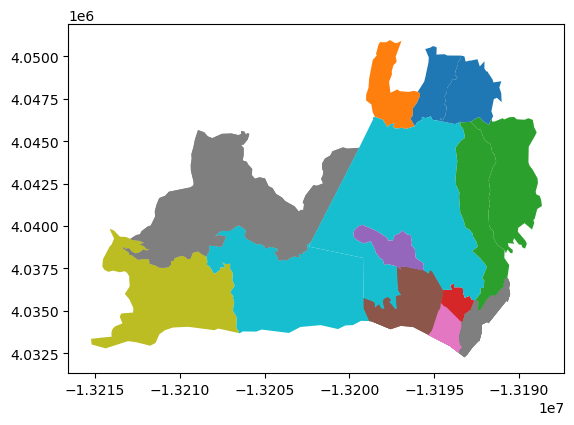

In [29]:
# Plot the joined data
palisades_eji.plot('TRACTCE')

c. Create an exploratory map showing:
1. the census tracts that intersect the Palisades fire perimeter and
2. the Palisades fire perimeter.

<Axes: title={'center': 'Census tracts overlapping Palisades fire permeter'}>

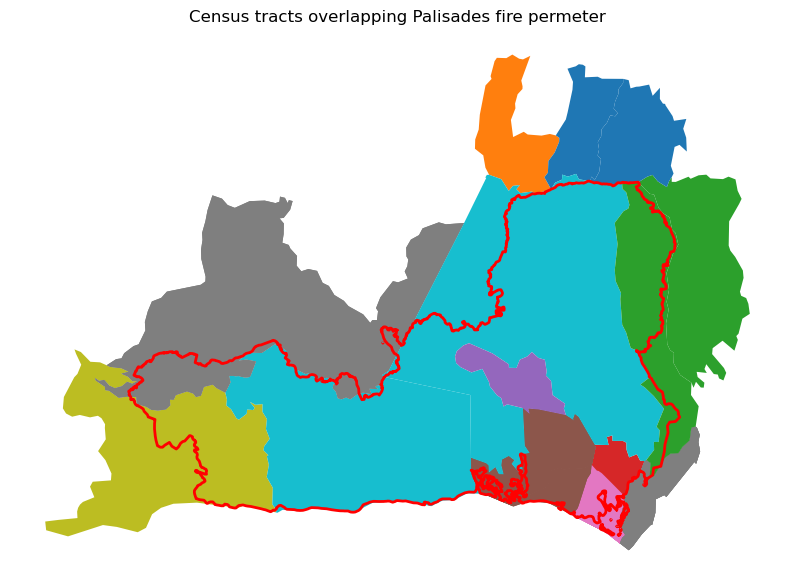

In [38]:
# Plot the Palisades fire perimeter and the intersecting EJI census tracts
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
palisades.boundary.plot(ax=ax, color='red', linewidth=2)
plt.title("Census tracts overlapping Palisades fire permeter")
palisades_eji.plot('TRACTCE', ax=ax)

d. Create the corresponding `geopandas.GeoDataFrame` and exploratory map for the Eaton fire.

In [31]:
# Spatially join the EJI data with the palisades
eaton_eji = gpd.sjoin(eji, eaton, how = "inner")
eaton_eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,objectid,type,shape__are,shape__len
4631,7051,06,037,461501,140000US06037461501,06037461501,06037461501,Los Angeles County,California,CA,...,-999,-999,4163.166698,1.004134e+06,"MULTIPOLYGON (((-13151476.267 4053178.790, -13...",1,2,Heat Perimeter,2.071021e+04,839.204218
4825,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.827 4074373.904, -13...",17,18,Heat Perimeter,8.314779e+07,97603.986189
4825,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.827 4074373.904, -13...",14,15,Heat Perimeter,2.405430e+02,59.202170
4825,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.827 4074373.904, -13...",15,16,Heat Perimeter,1.045547e+02,44.121115
4825,8038,06,037,930400,140000US06037930400,06037930400,06037930400,Los Angeles County,California,CA,...,-999,-999,278402.435077,1.494686e+09,"MULTIPOLYGON (((-13192132.827 4074373.904, -13...",16,17,Heat Perimeter,8.781250e+00,13.404382


<Axes: >

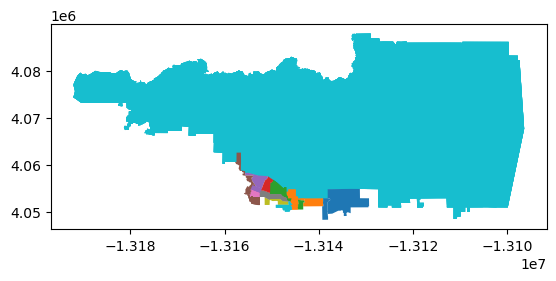

In [32]:
# Plot the joined data
eaton_eji.plot('TRACTCE')

<Axes: title={'center': 'Census tracts overlapping Eaton fire permeter'}>

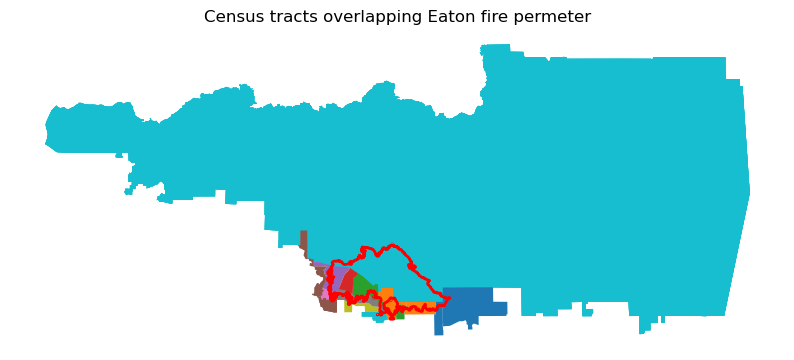

In [39]:
# Plot the Eaton fire perimeter and the intersecting EJI census tracts
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
eaton.boundary.plot(ax=ax, color='red', linewidth=2)
plt.title("Census tracts overlapping Eaton fire permeter")
eaton_eji.plot('TRACTCE', ax=ax)

### 3. Polygon clipping
1. Clip the census tracts to the Palisades fire perimeter using geopandas.clip().

<Axes: title={'center': 'Census tracts intersecting the Palisades fire perimeter after clipping'}>

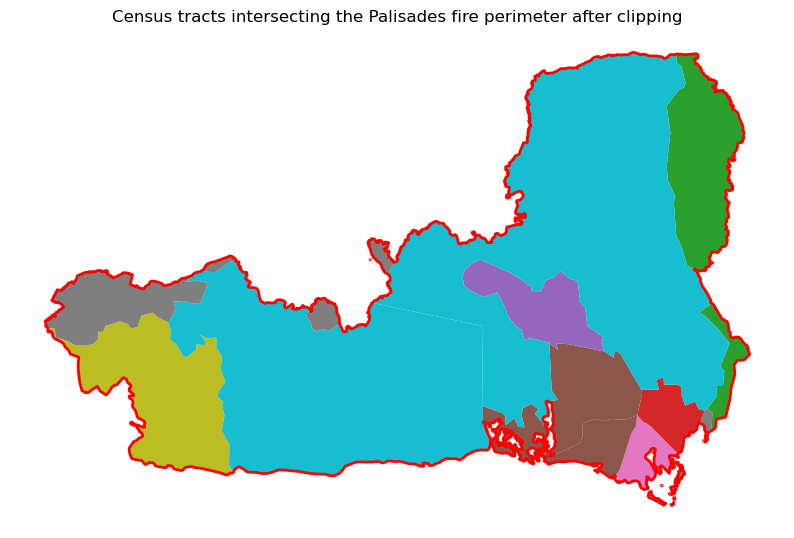

In [42]:
# Clip the census tracts to the Palisades fire perimeter
palisades_clip = gpd.clip(eji, palisades)

# Plot the clipped perimeter
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
palisades.boundary.plot(ax=ax, color='red', linewidth=2)
plt.title("Census tracts intersecting the Palisades fire perimeter after clipping")
palisades_clip.plot('TRACTCE', ax=ax)

2. Do the same for the Eaton fire perimeter.

<Axes: title={'center': 'Census tracts intersecting the Eaton fire perimeter after clipping'}>

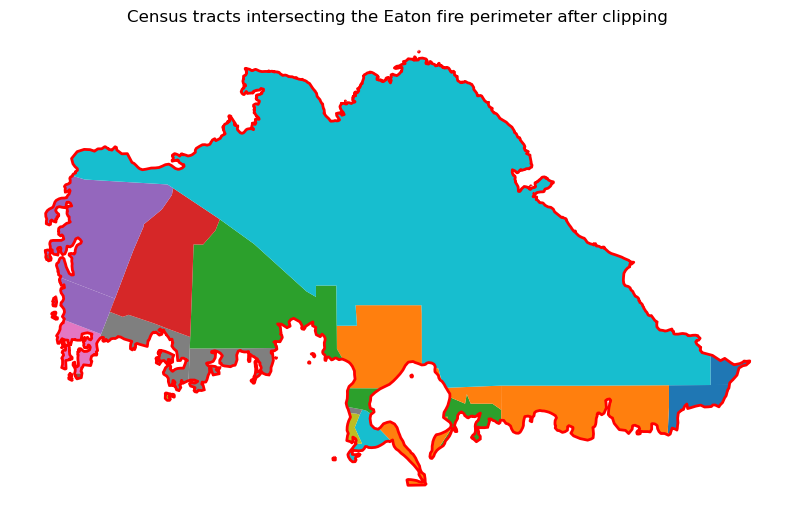

In [41]:
# Clip the census tracts to the Eaton fire perimeter
eaton_clip = gpd.clip(eji, eaton)

# Plot the clipped perimeter
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
eaton.boundary.plot(ax=ax, color='red', linewidth=2)
plt.title("Census tracts intersecting the Eaton fire perimeter after clipping")
eaton_clip.plot('TRACTCE', ax=ax)

3. Quickly visualize your data.

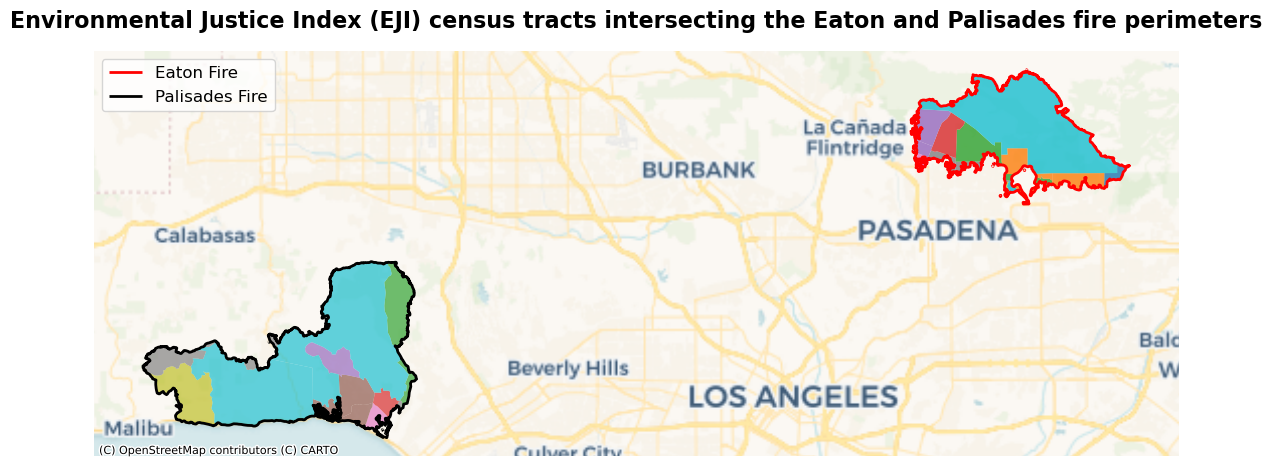

In [71]:
# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add fire perimeters
eaton.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Eaton Fire')
palisades.boundary.plot(ax=ax, edgecolor='black', linewidth=2, label='Palisades Fire')
ax.legend(loc='upper left')

# Plot EJI census tracts intersecting both fires
eaton_clip.plot('TRACTCE', alpha=0.8, ax=ax)
palisades_clip.plot('TRACTCE', alpha=0.68, ax=ax)

# Add basemap FIRST
cx.add_basemap(ax, source = cx.providers.CartoDB.Voyager)

# Turn off axes
ax.axis('off')

# Now add legend LAST so it's on top
ax.legend(loc='upper left', frameon=True, facecolor='white', fontsize=12)

# Add title
plt.title('Environmental Justice Index (EJI) census tracts intersecting the Eaton and Palisades fire perimeters',
          fontsize=16, fontweight= 'bold')

#plt.tight_layout()
plt.show()

### 5. Visualize EJI data
Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.

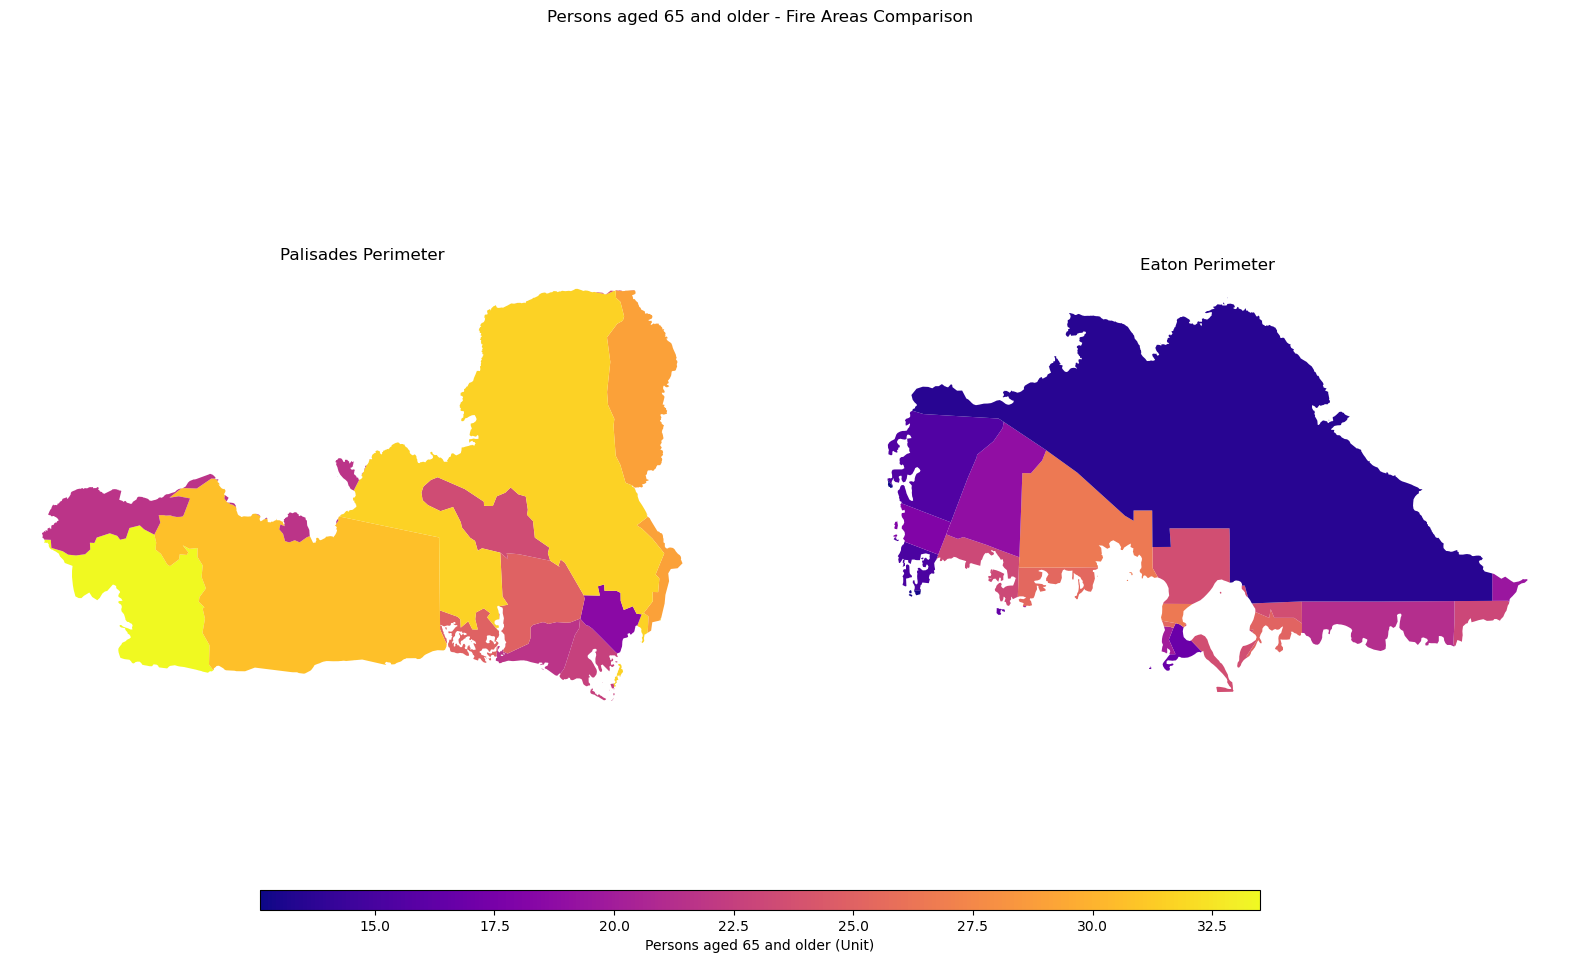

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_AGE65'

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), eaton_clip[eji_variable].min())
vmax = max(palisades_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clip.plot(column= eji_variable, cmap='plasma', vmin=vmin, vmax=vmax, legend=False, ax=ax1)
ax1.set_title('Palisades Perimeter')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(column=eji_variable, cmap='plasma', vmin=vmin, vmax=vmax, legend=False, ax=ax2)
ax2.set_title('Eaton Perimeter')
ax2.axis('off')

# Add overall title
fig.suptitle('Persons aged 65 and older - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Persons aged 65 and older (Unit)')

plt.show()